In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [13]:
#load data 
df = pd.read_csv("Unemployment in India.csv")
#some more information about the dataframe
print(df.head())
print(df.describe().T)
print(df.info())
print("Shape:",df.shape)
df.tail()

           Region         Date  Frequency   Estimated Unemployment Rate (%)   
0  Andhra Pradesh   31-05-2019    Monthly                              3.65  \
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
                                          count          mean           std   
 E

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Given Dataframe contain some null values , we have to remove then from df
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [16]:
#Renameing the column names to remove unwanted spaces
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [18]:
df.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [22]:
df[df.duplicated()]
#no duplication found 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


In [27]:
df["Date"]=pd.to_datetime(df["Date"],"dd-mm-yyyy")
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [30]:
df['Year']=df['Date'].dt.year

In [33]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year'],
      dtype='object')

In [65]:
fig = px.bar(df,y='Region',x='Estimated Unemployment Rate (%)', color='Region', animation_frame=str('Year'), 
title="Unemployment Rate per State with Date Slider",template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [58]:
state=df.groupby(["Region","Year"])[["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]].mean()
state=pd.DataFrame(state).reset_index()
state

,Region,Year,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2019,4.826875,8.402043e+06,40.095000
1,Andhra Pradesh,2020,11.010833,7.823493e+06,38.416667
2,Assam,2019,6.420667,5.508148e+06,46.140667
3,Assam,2020,6.438182,5.145623e+06,43.133636
4,Bihar,2019,13.882500,1.323785e+07,38.625000
5,Bihar,2020,25.632500,1.120397e+07,37.525833
6,Chandigarh,2019,15.822500,3.208352e+05,39.921250
7,Chandigarh,2020,16.330000,3.088232e+05,38.167500
8,Chhattisgarh,2019,7.346875,4.483388e+06,44.908750
9,Chhattisgarh,2020,11.765000,4.063647e+06,40.013333


In [67]:
fig=px.bar(state,x='Region',y='Estimated Unemployment Rate (%)',color='Region',animation_frame=str('Year'),template='plotly',title="How Covid-19 affect Estimated Unemployment Rate with year slider")
fig.show()

In [43]:
fig=px.bar(df,x="Date",y="Estimated Unemployment Rate (%)",animation_frame="Region",
           title="Unemployment rate over time for each state",template="plotly")
fig.show()

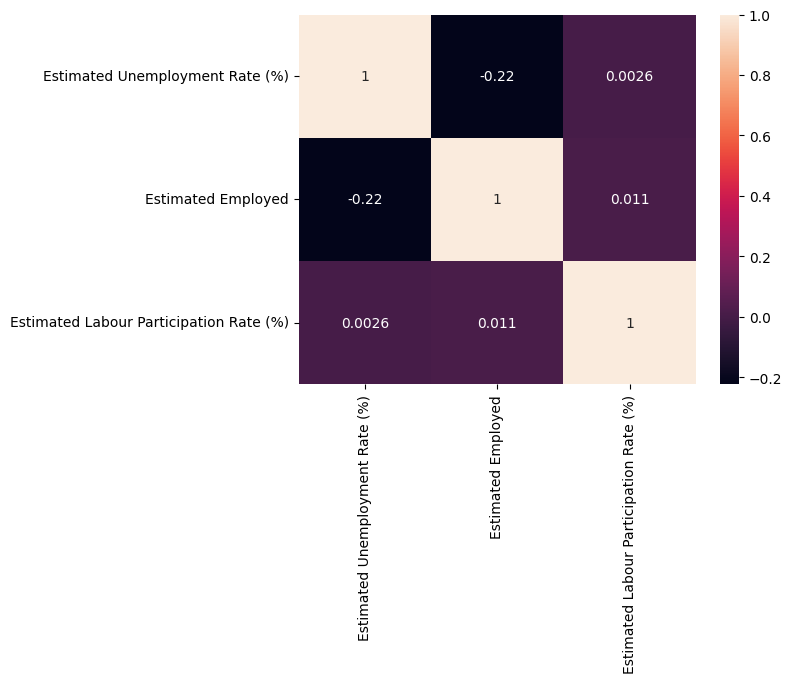

In [53]:
sb.heatmap(df[['Estimated Unemployment Rate (%)',
                'Estimated Employed',
                'Estimated Labour Participation Rate (%)']].corr(),
            annot=True
           )
plt.show()